In [21]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
random.seed = 42

In [30]:
def find_fires(img07, img14):
    diff = img07 - img14
    return diff[img07>img14.max()]

In [19]:
def find_npy_file(path, file, band):
    """
    Returns the string name of another file from the same time for a given GOES band npy file,
    or None if there is no such file in the given directory.
    
    Parameter path: The path where the returned file is located in
    Precondition: path is a string to a directory relative to the current one, with .npy files
    
    Parameter file: A file from the same time the returned file should have
    Precondition: file is a string with the name of the original file, and includes the path
    
    Parameter band: GOES band the returned file should be from
    Precondition: band is a string of length 2
    """
    for x in os.listdir(path):
        if x[19:21] == band and file[23:37]==x[27:41]:
            return x

In [31]:
path = '../../GOES_Files/npy_files/'
pathCM = '../../GOES_Files/clear_sky_mask/'

CM = 'OR_ABI-L2-ACMC-M3_G17_s20183202302147_e20183202304520_c20183202305119.npy'
file07 = None
file14 = None
while file07 == None or file14 == None:
    file07 = find_npy_file(path, CM, '07')
    file14 = find_npy_file(path, CM, '14')

In [28]:
CM

'OR_ABI-L2-ACMC-M3_G17_s20183202302147_e20183202304520_c20183202305119.npy'

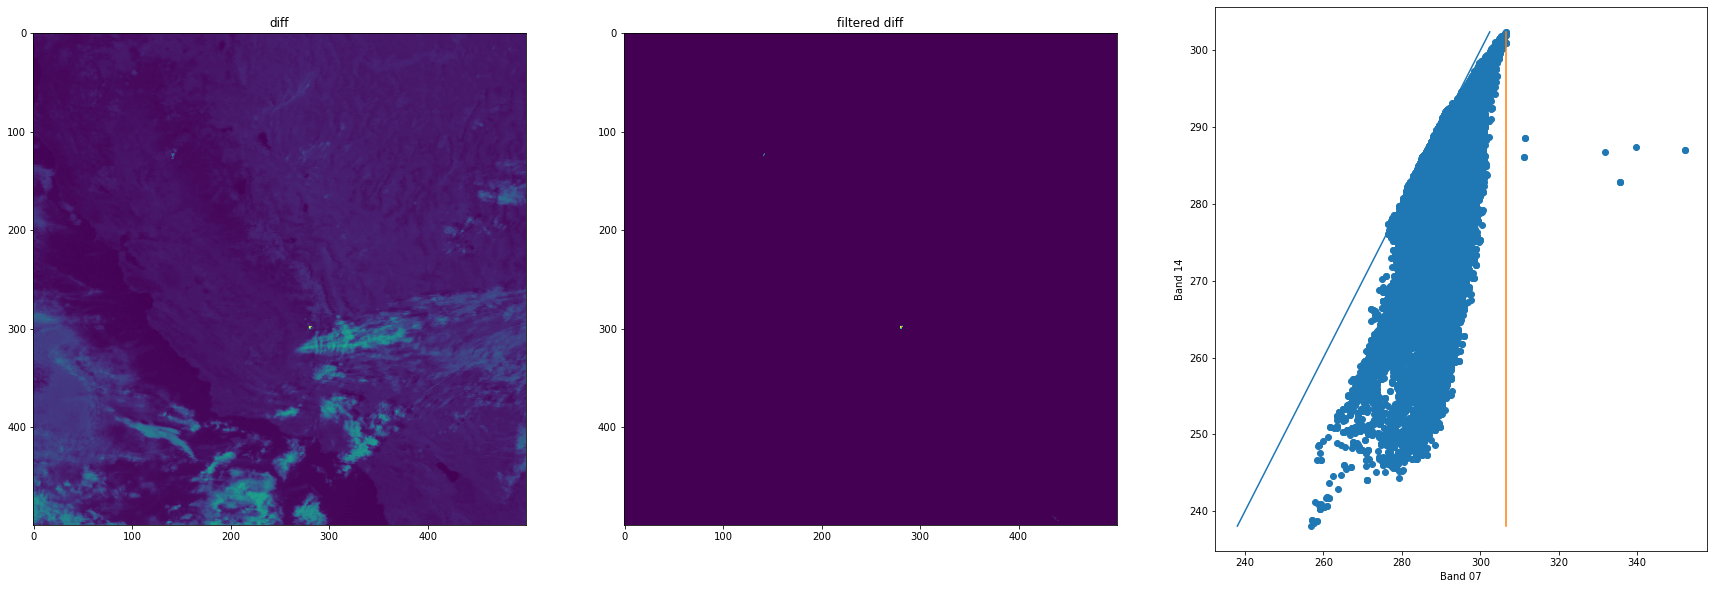

In [61]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

diff = img07-img14
fires = diff.copy()
row = np.argmax(img14)//500
col = np.argmax(img14) % 500
fires[img07<img07[row, col]] = 0

ax[0].imshow(diff, aspect='equal')
ax[0].set_title('diff')

ax[1].imshow(fires, aspect='equal')
ax[1].set_title('filtered diff')

ax[2].scatter(img07, img14)
ax[2].plot([img14.min(), img14.max()], [img14.min(), img14.max()], label='x=y')
ax[2].plot([img07[row, col], img07[row, col]], [img14.min(), img14.max()], label='fires')
ax[2].set_xlabel('Band 07')
ax[2].set_ylabel('Band 14')

plt.show()